In [66]:
import pickle
import matplotlib.pyplot as plt
import mplhep as hep
from coffea import hist
import numpy as np
hep.style.use("CMS")
import matplotlib.patches as patches

In [26]:
with open("EXO-23-016-MDS.pkl",'rb') as f:
    histograms = pickle.load(f)

In [27]:
histograms.keys()

dict_keys(['fig56_l', 'fig56_r', 'results', 'fig61', 'fig62', 'fig63_64'])

In [9]:
histograms['fig56_l']

<Hist (sample,MET) instance at 0x7f54f7dfcf10>

## Fig 56

In [51]:
mH=125
mS=40
ctau=1

def plot_fig56l(h_met):
    fig, ax = plt.subplots()
    
    ax=hist.plotratio(num=h_met.integrate("sample",'numer_hlt'),
                       denom=h_met.integrate("sample",'denom_hlt'),
                        xerr=True,clear=False,ax=ax,
                       error_opts={"linestyle":'none','lw':3})
    
    ax.set_ylabel("HLT Efficiency")
    ax.set_xlabel(r"$p_T^{~\text{ miss}}[GeV]$")    
    ax.text(0.6, 0.12, 'Cluster Size > 50', transform=ax.transAxes,fontsize="small")
    
    ax.legend(["DT MDS"]
              ,title=r"$H\rightarrow SS \rightarrow 4b$"+"\n"+ r"$m_H=%s~$GeV, $m_S=%s~$GeV, $c\tau=%s~$m"%(mH,mS,ctau)
              ,title_fontsize="small",
             loc=7)
    ax.set_ylim(0,1.2)
    hep.cms.label(ax=ax,com=13.6)
    fig.savefig("./plots/MDS_DT_eff_v_MET.pdf")

def plot_fig56r(h_cls):
    fig, ax = plt.subplots()
    ax=hist.plotratio(num=h_cls.integrate("sample",'numer_hlt'),
                       denom=h_cls.integrate("sample",'denom_hlt'),
                        xerr=True,clear=False,ax=ax,
                       error_opts={"linestyle":'none','lw':3})
    
    ax.set_ylabel("HLT Efficiency")
    ax.legend(["DT MDS"],
              title=r"$H\rightarrow SS \rightarrow 4b$"+"\n"+ r"$m_H=125~$GeV, $m_S=40~$GeV, $c\tau=1~$m",title_fontsize="small",
             loc=7)
    ax.text(0.6, 0.12, r"$p_T^{~\text{ miss}}>250~GeV$", transform=ax.transAxes,fontsize="small")
    ax.set_ylim(0,1.2)
    ax.set_xlim(0,None)
    hep.cms.label(ax=ax,com=13.6)
    fig.savefig("./plots/MDS_DT_eff_v_cls.pdf")   

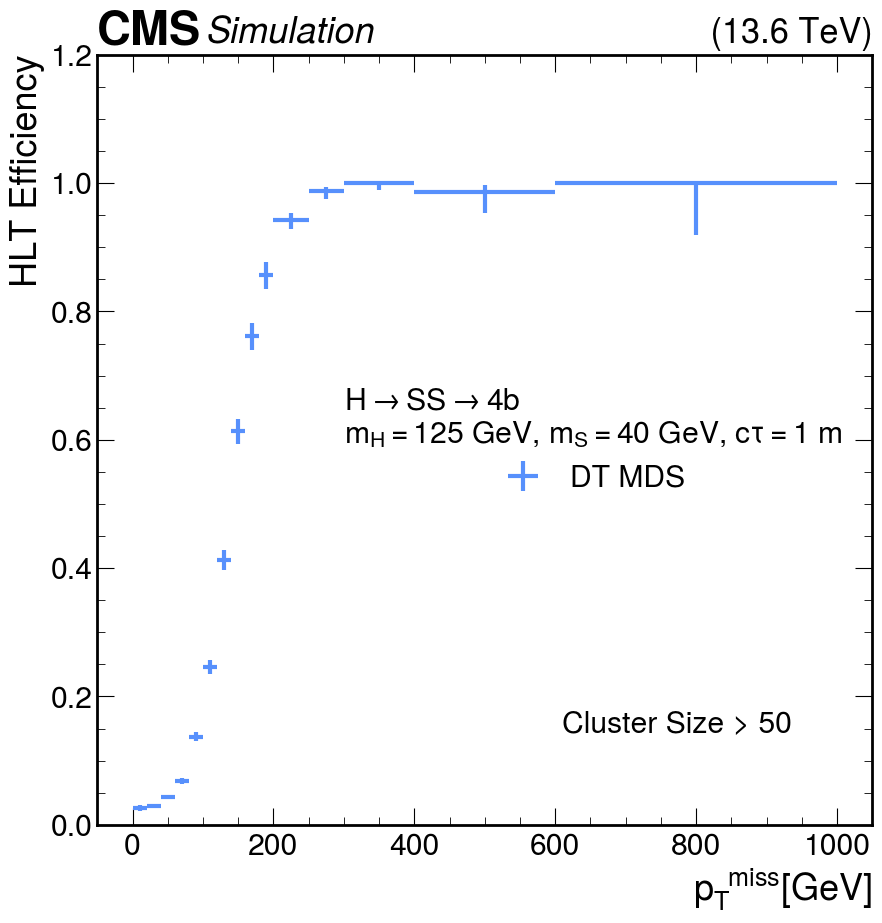

In [52]:
plot_fig56l(histograms['fig56_l'])

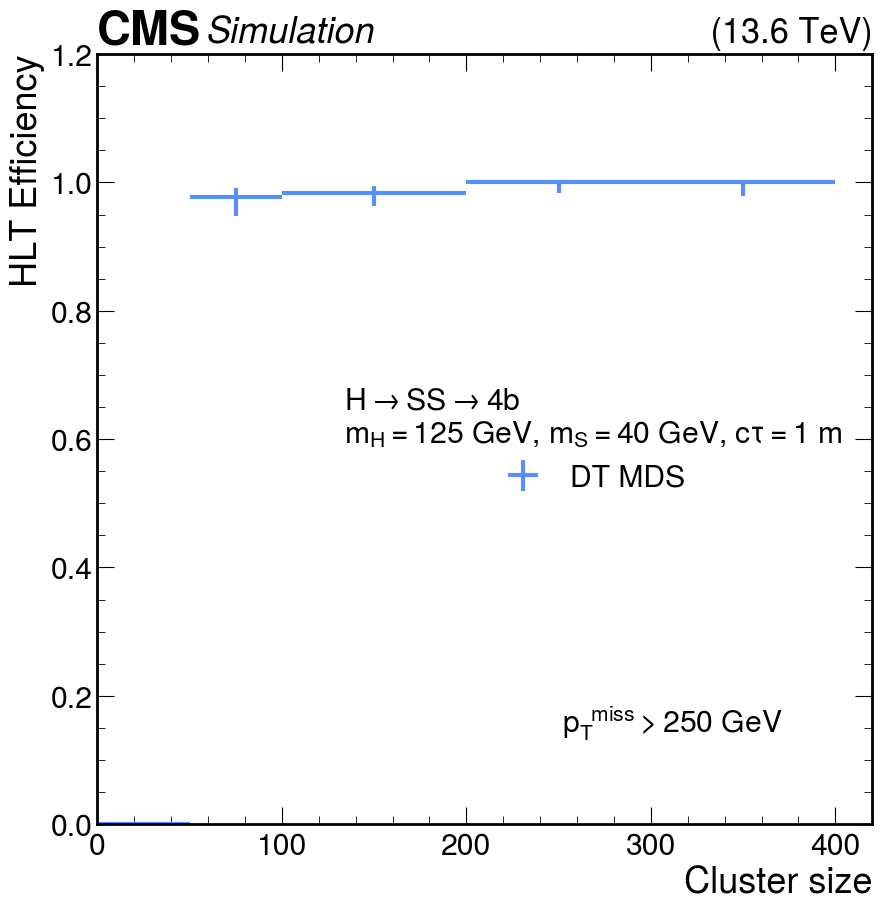

In [53]:
plot_fig56r(histograms['fig56_r'])

## Fig 60

In [56]:
def plot_fig60l(results, mH, mS, ax):

    sample = r"$H\rightarrow SS\rightarrow 4b$"+"\n"+"$(m_H,m_S)$=(%s,%s) GeV"%(mH,mS)
    label_fs = "medium"

    ## Run 2
    data = np.array(sorted([[ctau/1000,v["MET200_csc"]/v['denom_csc']] for (mass,ctau),v in results.items() if v['denom_csc']>0 and mass==mS],key=lambda x: x[0]))
    ax.plot(data[:,0],data[:,1],label=r"Run 2 - $p_T^{\mathrm{miss}}>200$ GeV",lw=3, marker='o',ms=10)

    # L1 block:
    data = np.array(sorted([[ctau/1000,v["HMTnominal_csc"]/v['denom_csc']] for (mass,ctau),v in results.items() if v['denom_csc']>0 and mass==mS],key=lambda x: x[0]))
    ax.plot(data[:,0],data[:,1],label="Run 3 - L1T (CSC MDS)",lw=3, marker='s',ms=10)

    data = np.array(sorted([[ctau/1000,v["CscLoose_csc"]/v['denom_csc']] for (mass,ctau),v in results.items() if v['denom_csc']>0 and mass==mS],key=lambda x: x[0]))
    ax.plot(data[:,0],data[:,1],label="Run 3 - L1T+HLT (CSC MDS)",lw=3, marker='^',ms=10)
    
    ax.legend(title=sample,title_fontsize="small",loc=2,fontsize="medium")
    ax.set_xlabel(r"LLP $c\tau$ [m]")
    ax.set_xscale("log")    
    ax.tick_params(axis='both', which='major', labelsize=24)    
    ax.set_ylim(0,0.5)
    ax.set_ylabel("Acceptance")
    hep.cms.label(ax=ax,com=13.6)
    return ax

def plot_fig60r(results,mH,mS,ax):
    sample = r"$H\rightarrow SS\rightarrow 4b$"+"\n"+"$(m_H,m_S)$=(%s,%s) GeV"%(mH,mS)
    
    data = np.array(sorted([[ctau/1000,v["MET200_dt"]/v['denom_dt']] for (mass,ctau),v in results.items() if v['denom_dt']>100 and mass==mS],key=lambda x: x[0]))
    ax.plot(data[:,0],data[:,1],label=r"Run 2 - $p_T^{\mathrm{miss}}>200$ GeV",lw=3,marker="o",ms=10)
    

    data = np.array(sorted([[ctau/1000,v["METDT_dt"]/v['denom_dt']] for (mass,ctau),v in results.items() if v['denom_dt']>100 and mass==mS],key=lambda x: x[0]))
    ax.plot(data[:,0],data[:,1],label="Run 3 - L1T+HLT (DT MDS)",lw=3,marker="^",ms=10,color="r")
    
    ax.legend(title=sample,title_fontsize="small",fontsize="medium")
    ax.set_xlabel(r"LLP $c\tau$ [m]")
    ax.tick_params(axis='both', which='major', labelsize=24)        
    ax.set_xscale("log")

    ax.set_ylabel("Acceptance")
    hep.cms.label(ax=ax,com=13.6)

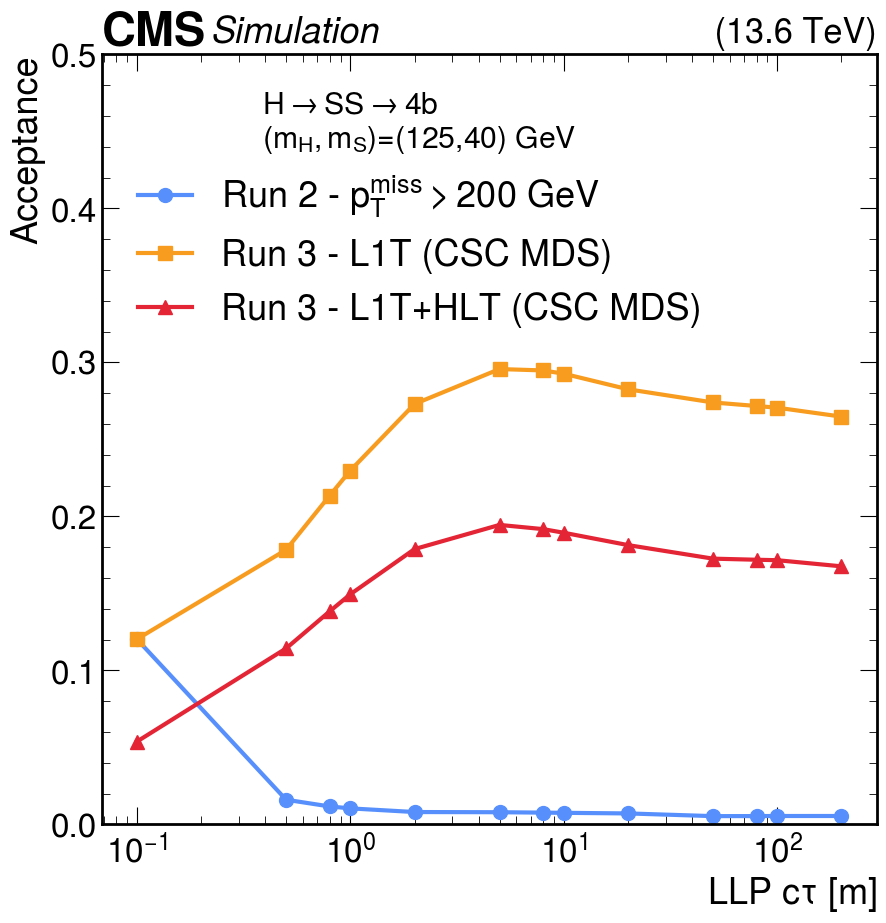

In [57]:
fig, axs = plt.subplots()
mH=125
mS=40
results = histograms["results"]
ax=plot_fig60l(results,mH, mS,axs)
fig.savefig(f'./plots/MDS_CSC_acc_v_ctau_mH-{mH}_mS-{mS}.pdf')

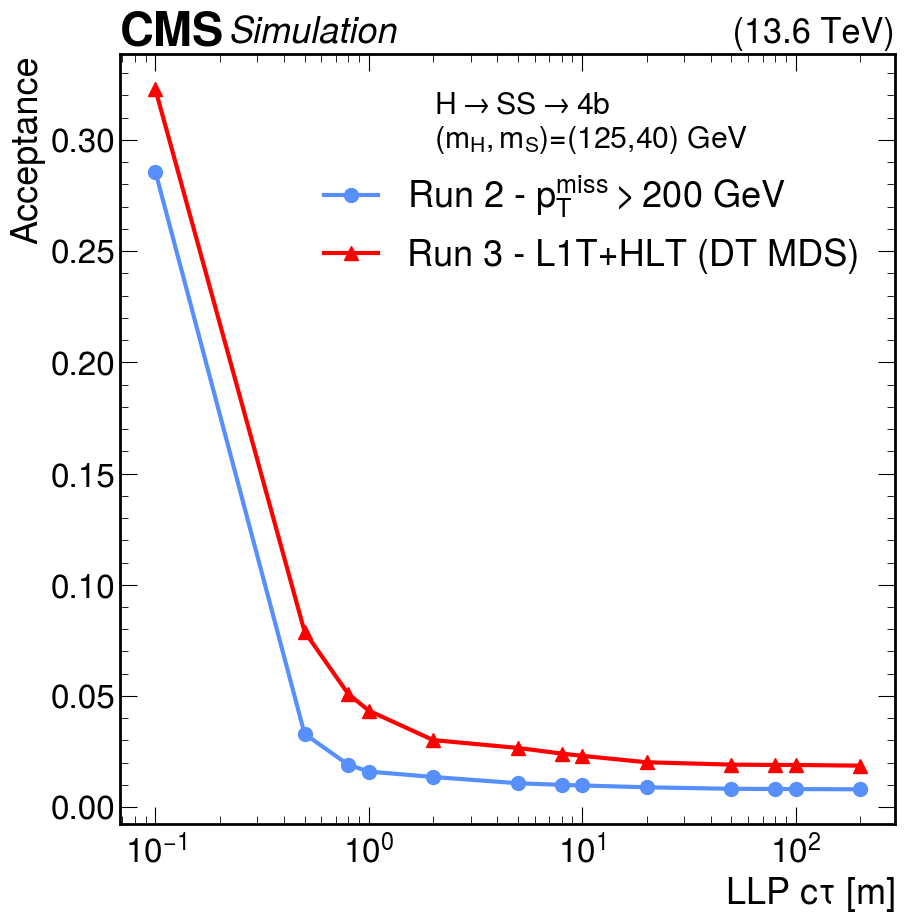

In [58]:
fig, axs = plt.subplots()
ax=plot_fig60r(results,mH,mS,axs)
fig.savefig(f'./plots/MDS_DT_acc_v_ctau_mH-{mH}_mS-{mS}.pdf')

## Fig 61, Fig 62

In [87]:
def drawCSCz(ax):
    ax.set_xlim(550,1075)
    (xmin,xmax) = ax.get_xlim()

    xmin = 500
    y_max = ax.get_ylim()[1]

    preME11 = patches.Rectangle((xmin, 0), 568-xmin, 2,color='grey',alpha=0.3)
    ME11_12 = patches.Rectangle((632, 0), 39, 2,color='grey',alpha=0.3)
    ME12_2  = patches.Rectangle((724, 0), 65, 2,color='grey',alpha=0.3)
    ME2_3   = patches.Rectangle((849, 0), 62, 2,color='grey',alpha=0.3)
    ME3_4   = patches.Rectangle((970, 0), 32, 2,color='grey',alpha=0.3)
    beyond  = patches.Rectangle((1050, 0),50, 2,color='grey',alpha=0.3)

    ax.text(570*1.045, y_max*1.02, 'ME1/1', fontsize=10,rotation=90)
    ax.text(670*1.02, y_max*1.02, 'ME1/2-3', fontsize=10,rotation=90)
    ax.text(800, y_max*1.02, 'ME2', fontsize=10,rotation=90)
    ax.text(920, y_max*1.02, 'ME3', fontsize=10,rotation=90)
    ax.text(1015, y_max*1.02,'ME4', fontsize=10,rotation=90)
    ax.text(xmin+5 ,y_max*0.15, "Steel", fontsize=15,rotation=90)
    ax.text(xmax-20,y_max*0.15, "Beyond CMS", fontsize=15,rotation=90)

    ax.add_patch(preME11)
    ax.add_patch(ME11_12)
    ax.add_patch(ME12_2)
    ax.add_patch(ME2_3)
    ax.add_patch(ME3_4)
    ax.add_patch(beyond)
    return ax

def drawDTr(ax,text_loc=0.7):
    ax.set_xlim(350,760)
    (xmin,xmax) = ax.get_xlim()

    y_max = ax.get_ylim()[1]

    preMB1 = patches.Rectangle((xmin, 0), 405-xmin, 2,color='grey',alpha=0.3)
    MB1_2  = patches.Rectangle((465, 0) , 20, 2,color='grey',alpha=0.3)
    MB2_3  = patches.Rectangle((540, 0) , 55, 2,color='grey',alpha=0.3)
    MB3_4  = patches.Rectangle((640, 0) , 60, 2,color='grey',alpha=0.3)


    ax.text(420, y_max*1.02, 'MB1', fontsize=12)
    ax.text(500, y_max*1.02, 'MB2', fontsize=12)
    ax.text(600, y_max*1.02, 'MB3', fontsize=12)
    ax.text(710, y_max*1.02, 'MB4', fontsize=12)
    ax.axvline(740,linestyle="--",color='grey')

    ax.text(xmin+5 ,y_max*0.15, "Steel/Solenoid", fontsize=15,rotation=90)
    ax.text(xmax-10,y_max*0.15, "Beyond CMS", fontsize=15,rotation=90)


    ax.add_patch(preMB1)
    ax.add_patch(MB1_2)
    ax.add_patch(MB2_3)
    ax.add_patch(MB3_4)
    return ax


def plot_fig61(ax,hz,drawCSC=False,mH=125,mS=40,ctau=1):
    hist.plotratio(num=hz.integrate("sample",'numer_l1'),
                    denom=hz.integrate("sample",'denom'),xerr=True,
                    error_opts={"linestyle":'none',"lw":2,"marker":"o"},ax=ax
                      )
    hist.plotratio(num=hz.integrate("sample",'numer'),
                    denom=hz.integrate("sample",'denom'),xerr=True,
                    error_opts={"linestyle":'none',"lw":2,'marker':"s"},ax=ax,clear=False
                      )    
    ax.set_ylabel("Acceptance")
    ax.legend(["L1T","L1T+HLT"]
              ,title=r"$H\rightarrow SS \rightarrow 4b$"+"\n"+ r"$m_H=%s~$GeV, $m_S=%s~$GeV, $c\tau=%s~$m"%(mH,mS,ctau),title_fontsize='x-small'
             ,loc=2,alignment="left")
    
    if drawCSC:
        ax=drawCSCz(ax)
    ax.set_ylim(0,1)
    ax.set_xlim(0,1100)
    ax.grid() 
    hep.cms.label(ax=ax,com=13.6)
    return ax

def plot_fig62(ax,hr,drawMS=False,mH=125,mS=40,ctau=1):
    hist.plotratio(num=hr.integrate("sample",'numer_dt_L1MET_tight'),
                    denom=hr.integrate("sample",'denom_dt_L1MET'),xerr=True,
                    error_opts={"linestyle":'none',"lw":2,"marker":"o"},ax=ax
                      )
    hist.plotratio(num=hr.integrate("sample",'numer_dt_L1MET_tight'),
                    denom=hr.integrate("sample",'denom'),xerr=True,
                    error_opts={"linestyle":'none',"lw":2,"marker":"s"},ax=ax,clear=False
                      )    
    ax.set_ylabel("Acceptance")
    ax.legend(
            # ["HLT acceptance(passL1MET)","HLT acceptance(all gen)"]
            ["HLT","L1T+HLT"]        
              # ,title=r"$H\rightarrow SS \rightarrow 4b$"+"\n"+ r"$m_H=125~$GeV, $m_S=40~$GeV, $c\tau=1~$m",title_fontsize='x-small'
              ,title=r"$H\rightarrow SS \rightarrow 4b$"+"\n"+ r"$m_H=%s~$GeV, $m_S=%s~$GeV, $c\tau=%s~$m"%(mH,mS,ctau),title_fontsize='x-small'              
             ,loc=2,alignment="left")
    
    if drawMS:
        ax=drawDTr(ax)
    ax.set_ylim(0,1.2)
    ax.set_xlim(0,900)
    ax.grid() 
    hep.cms.label(ax=ax,com=13.6)
    return ax

## Fig 61

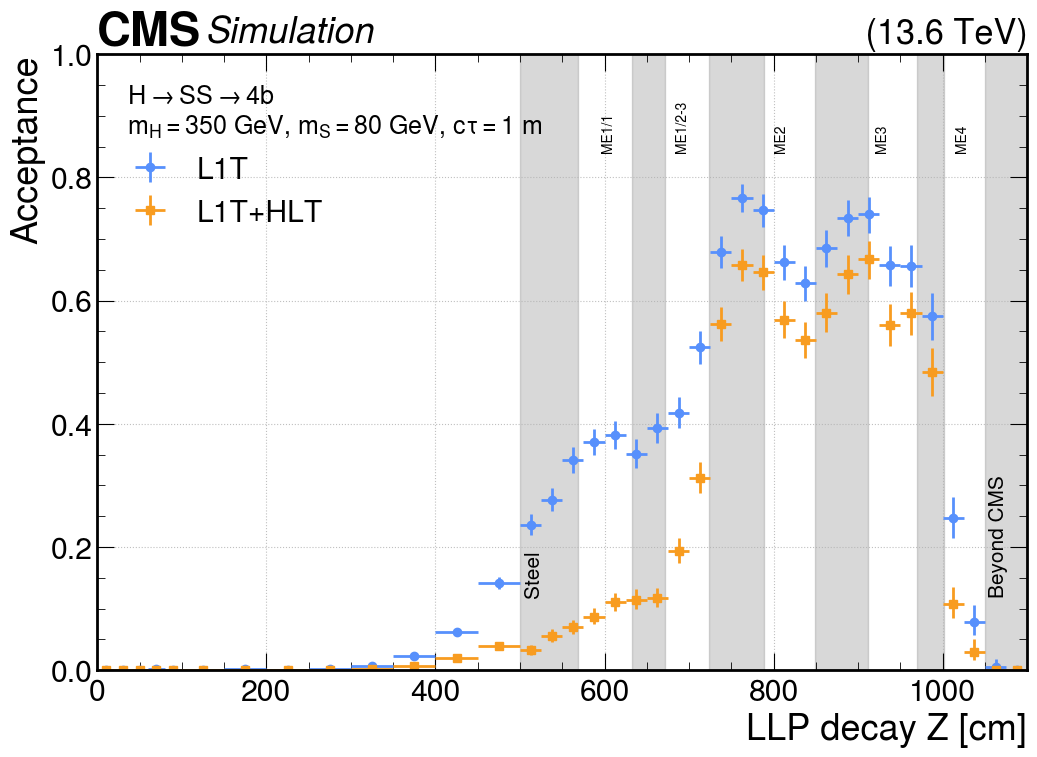

In [88]:
hz = histograms["fig61"]
fig, ax = plt.subplots(figsize=(12,8))
MH=350
MS=80
ax = plot_fig61(ax,hz,True,MH,MS,ctau)
fig.savefig("./plots/MDS_CSC_acc_v_Z.pdf")

## Fig 62

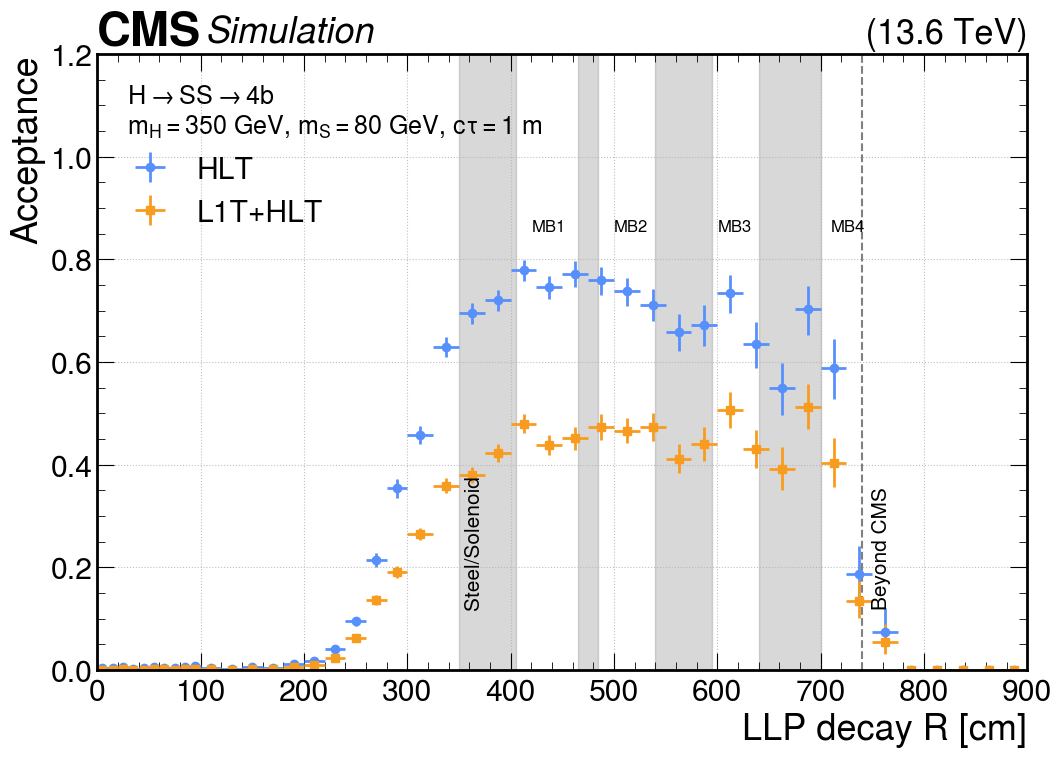

In [90]:
hz = histograms["fig62"]
fig, ax = plt.subplots(figsize=(12,8))
MH=350
MS=80
ax = plot_fig62(ax,hz,True,MH,MS,ctau)
fig.savefig("./plots/MDS_DT_acc_v_r.pdf")

## Fig 63, 64

In [68]:
import hist as bhist
def drawRZ(ax):
    MB_lim=0
    ax.set_ylim(0,750)
    ax.set_xlim(0,1100)
    (xmin,xmax) = ax.get_xlim()

    y_max = ax.get_ylim()[1]

    MB1 = patches.Rectangle((MB_lim,402),661-MB_lim,449-402,color='grey',alpha=0.3)
    MB2 = patches.Rectangle((MB_lim,490),661-MB_lim,533-490,color='grey',alpha=0.3)
    MB3 = patches.Rectangle((MB_lim,597),661-MB_lim,636-597,color='grey',alpha=0.3)
    MB4 = patches.Rectangle((MB_lim,700),661-MB_lim,738-700,color='grey',alpha=0.3)

    solenoid= patches.Rectangle((MB_lim,295),661-MB_lim,380-295,color='grey',alpha=0.3)

    ME22 = patches.Rectangle((791,357),850-791,700-357,color='grey',alpha=0.3)
    ME32 = patches.Rectangle((911,357),970-911,700-357,color='grey',alpha=0.3)
    ME42 = patches.Rectangle((1002,357),1063-1002,700-357,color='grey',alpha=0.3)

    ME21 = patches.Rectangle((789,139),850-789,345-139,color='grey',alpha=0.3)
    ME31 = patches.Rectangle((915,160),970-915,345-160,color='grey',alpha=0.3)
    ME41 = patches.Rectangle((1002,178),1063-1002,345-178,color='grey',alpha=0.3)

    ME11 = patches.Rectangle((580,100),632-580,275-100,color='grey',alpha=0.3)
    ME12 = patches.Rectangle((668,275),724-668,465-275,color='grey',alpha=0.3)
    ME13 = patches.Rectangle((686,505),724-686,700-505,color='grey',alpha=0.3)

    list_of_boxes = [ME11,ME12,ME13,ME21,ME22,ME31,ME32,ME41,ME42,MB1,MB2,MB3,MB4,solenoid]

    for box in list_of_boxes:
        ax.add_patch(box)

    ax.text(410, 415, "MB1",fontsize=12)
    ax.text(410, 500, "MB2",fontsize=12)
    ax.text(410, 605, "MB3",fontsize=12)
    ax.text(410, 708, "MB4",fontsize=12)

    ax.text(665, 705, "ME1/3",fontsize=12)
    ax.text(780, 705, "ME2/2",fontsize=12)
    ax.text(900, 705, "ME3/2",fontsize=12)
    ax.text(990, 705, "ME4/2",fontsize=12)

  #ax.text(680, 140, "Steel",fontsize=12)
    #ax.text(410,660, "Steel",fontsize=12)
    ax.text(410, 330, "Solenoid",fontsize=12)
    #ax.text(430, 150, "HCAL",fontsize=12)

    ax.text(615, 110, "ME1/1",rotation='vertical',fontsize=12)
    ax.text(695, 331, "ME1/2",rotation='vertical',fontsize=12)
    ax.text(830, 145, "ME2/1",rotation='vertical',fontsize=12)
    ax.text(955, 170, "ME3/1",rotation='vertical',fontsize=12)
    ax.text(1040, 190, "ME4/1",rotation='vertical',fontsize=12)
    return ax

def plotLLP_rz(ax,hrz,numer,denom,drawMS=True,vmin=0,vmax=1,rmin=100,zmin=100,zlabel="Acceptance"):

    hrz=hrz.to_hist()
    zbins = hrz.axes['z'].edges
    rbins = hrz.axes['r'].edges  
    rzRatio = hrz[bhist.loc(numer),:,:].values()/hrz[bhist.loc(denom),:,:].values()    

    x,y = np.meshgrid(zbins, rbins)
    print(x.shape, y.shape,rzRatio.T.shape)
    pc = ax.pcolormesh(x,y,rzRatio.T,vmin=vmin,vmax=vmax)
    ax.add_collection(pc)
    ax.set_xlabel(hrz.axes['z'].label)
    ax.set_ylabel(hrz.axes['r'].label)    
    
    fig.colorbar(pc, ax=ax, label=zlabel)

    if drawMS:
        ax=drawRZ(ax)
    ax.set_ylim(rmin,900)
    ax.set_xlim(zmin,1100)
    hep.cms.label(ax=ax,com=13.6)    

    return ax

## Fig 63 L

In [75]:
hrz = histograms["fig63_64"]
rbins = np.array([0,10,20,30,40,50,60,70,80,90,100,120,140,160,180,200,220,240,260,280,300,325,350,375,400,425,450,475,500,
                      525.,  550.,  575.,  600.,  650.,  700.,900]) 
hrz=hrz.rebin("r",hist.Bin("r","LLP decay R [cm]",rbins))



/opt/conda/lib/python3.10/site-packages/coffea/hist/hist_tools.py:1540: UserWarning: sample is a protected keyword and cannot be used as axis name
  return hist.Hist(self.to_boost())
/tmp/ipykernel_2658/2824236547.py:61: RuntimeWarning: invalid value encountered in divide
  rzRatio = hrz[bhist.loc(numer),:,:].values()/hrz[bhist.loc(denom),:,:].values()


(36, 38) (36, 38) (35, 37)


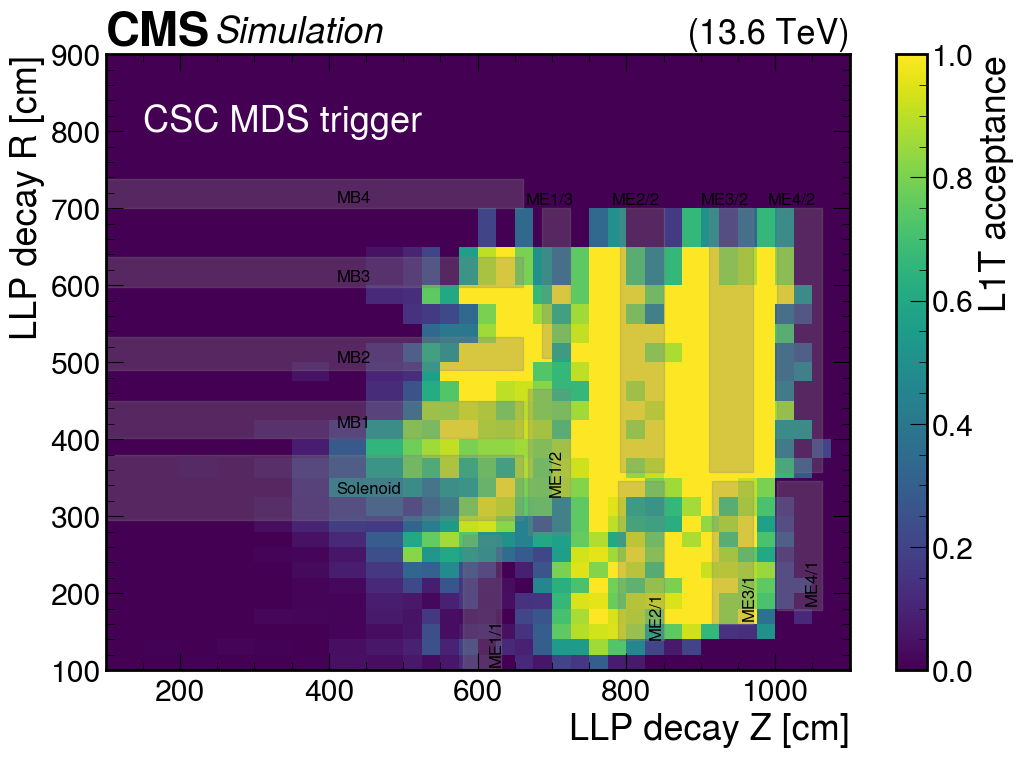

In [76]:
fig,ax = plt.subplots(figsize=(12,8))
ax = plotLLP_rz(ax,hrz,"numer_l1","denom",zlabel="L1T acceptance") # L1 CSC acceptance
ax.text(150,800,"CSC MDS trigger",color="white")
ax.set_xlabel("LLP decay Z [cm]")
fig.savefig("./plots/MDS_CSC_2D_L1acc_v_rZ.pdf")

## Fig 63 R

/opt/conda/lib/python3.10/site-packages/coffea/hist/hist_tools.py:1540: UserWarning: sample is a protected keyword and cannot be used as axis name
  return hist.Hist(self.to_boost())
/tmp/ipykernel_2658/2824236547.py:61: RuntimeWarning: invalid value encountered in divide
  rzRatio = hrz[bhist.loc(numer),:,:].values()/hrz[bhist.loc(denom),:,:].values()


(36, 38) (36, 38) (35, 37)


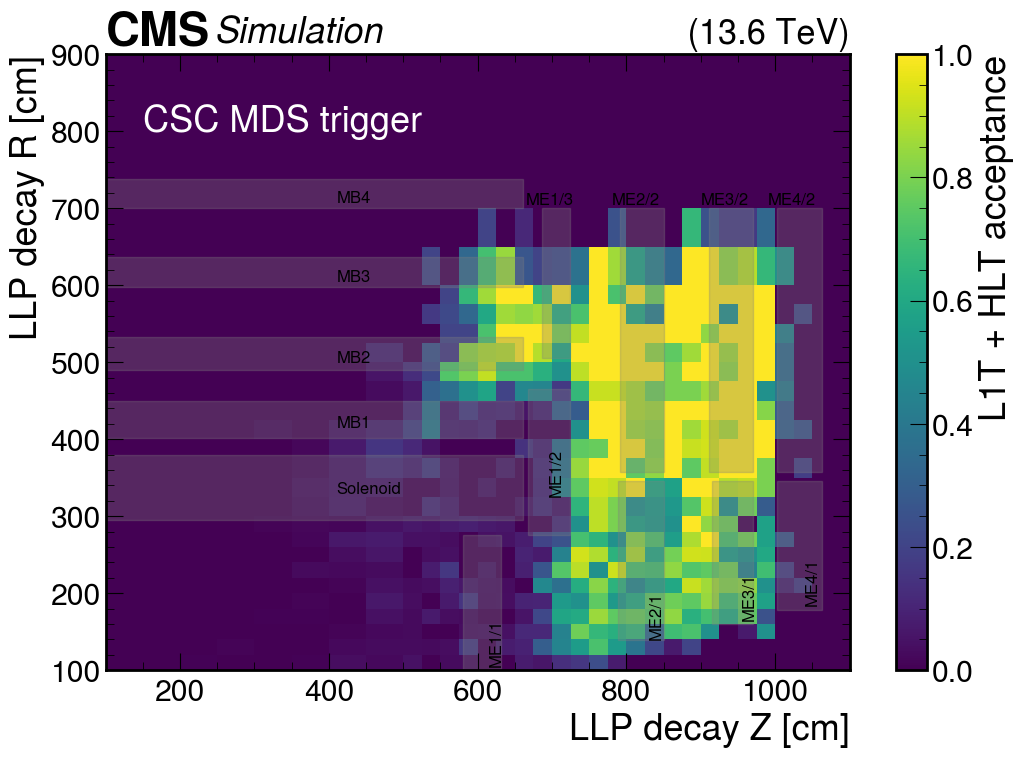

In [77]:
fig,ax = plt.subplots(figsize=(12,8))
ax = plotLLP_rz(ax,hrz,"numer","denom",zlabel="L1T + HLT acceptance") # HLT acceptance
ax.text(150,800,"CSC MDS trigger",color="white")
ax.set_xlabel("LLP decay Z [cm]")
fig.savefig("./plots/MDS_CSC_2D_HLTacc_v_rZ.pdf")

## Fig 64

/opt/conda/lib/python3.10/site-packages/coffea/hist/hist_tools.py:1540: UserWarning: sample is a protected keyword and cannot be used as axis name
  return hist.Hist(self.to_boost())
/tmp/ipykernel_2658/2824236547.py:61: RuntimeWarning: invalid value encountered in divide
  rzRatio = hrz[bhist.loc(numer),:,:].values()/hrz[bhist.loc(denom),:,:].values()


(37, 23) (37, 23) (36, 22)


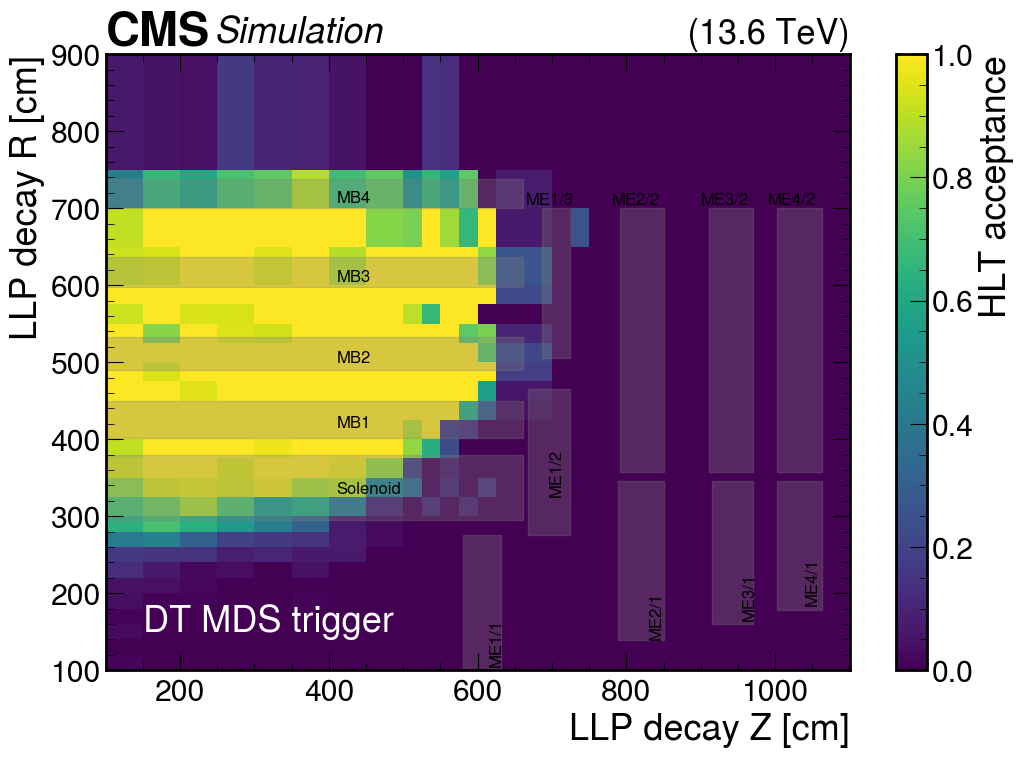

In [79]:
hrz = histograms["fig63_64"]
fig,ax = plt.subplots(figsize=(12,8))
rbins = np.array([0,10,20,30,40,50,60,70,80,90,100,120,140,160,180,200,220,240,260,280,300,325,350,375,400,425,450,475,500,
                  525.,  550.,  575.,  600.,  650.,  700.,  750.,  900.])  
zbins = np.array([0,20,40,60,80,100,150,200,250,300,350,400,450,500,525.,  550.,  575.,  600.,  625.,  700.,725.,  750., 1100.])    
hrz=hrz.rebin("r",hist.Bin("r","LLP decay R [cm]",rbins))
hrz=hrz.rebin("z",hist.Bin("z","LLP decay Z [cm]",zbins))
ax = plotLLP_rz(ax,hrz,"numer_dt_L1MET","denom_dt_L1MET",zlabel="HLT acceptance") # HLT DT acceptance
ax.text(150,150,"DT MDS trigger",color="white")
ax.set_xlabel("LLP decay Z [cm]")
fig.savefig("./plots/MDS_DT_2D_HLTacc_v_rZ.pdf")